In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('data_cleaned.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,Max Salary,avg_salary,job_state,age,python,excel,sql,Private,Public,desc_len
0,Data Analyst I,$41K - $55K (Glassdoor est.),Job Summary:\nIf you live in or around the San...,4.3,Firstmark Credit Union,"San Antonio, TX",201 to 500 Employees,1932,Private,Banking & Lending,...,55.0,48.0,TX,91,0,0,0,1,0,870
1,Reporting Data Analyst,$64K - $92K (Glassdoor est.),"Medlogix, LLC delivers innovative medical clai...",2.6,MEDLOGIX LLC,"Lansdale, PA",Unknown,-1,Private,Insurance Carriers,...,92.0,78.0,PA,-1,0,0,0,1,0,1004
2,Junior Data Analyst,$45K - $69K (Glassdoor est.),Hintz and Co is a boutique full service media ...,3.8,Hintz and Co,"Los Angeles, CA",1 to 50 Employees,1979,Private,Architectural & Engineering Services,...,69.0,57.0,CA,44,0,0,0,1,0,875
3,Data Analyst(SQL),$64K - $106K (Glassdoor est.),Job Title: Data Analyst (SQL)\nJob Summary: We...,4.1,Leading Torch LLC,"Plano, TX",1 to 50 Employees,-1,Private,-1,...,106.0,85.0,TX,-1,0,0,1,1,0,749
4,Data Analyst (Jr.),$80K - $100K (Employer est.),Department of Veterans Affairs experience? Do ...,4.0,Ben Allegretti Consulting BAC,"Washington, DC",Unknown,2007,NaN,National Agencies,...,100.0,90.0,DC,16,0,0,0,0,0,1240


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'Min Salary', 'Max Salary', 'avg_salary', 'job_state', 'age', 'python',
       'excel', 'sql', 'Private', 'Public', 'desc_len'],
      dtype='object')

In [5]:
def seniority(title):
    if 'sr.' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower() or 'head' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower():
        return 'jr'
    else:
        return 'na'
    
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'    

In [6]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [7]:
df.job_simp.value_counts()

analyst    192
Name: job_simp, dtype: int64

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        175
jr         15
senior      2
Name: seniority, dtype: int64

In [9]:
#  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0       870
1      1004
2       875
3       749
4      1240
       ... 
187     956
188     775
189    1061
190     870
191    1248
Name: desc_len, Length: 192, dtype: int64

In [10]:
df[df['hourly']==1][['hourly','Min Salary','Max Salary']]

,hourly,Min Salary,Max Salary
5,1,NaN,NaN
9,1,58.00,60.00
13,1,50.00,55.00
17,1,38.00,40.00
24,1,55.00,60.00
27,1,50.00,60.00
35,1,37.50,43.70
110,1,28.79,37.28
124,1,24.75,28.50
130,1,28.79,37.28


In [11]:
df = df.dropna(subset=['Min Salary', 'Max Salary'], how='all')
df[df['hourly']==1][['hourly','Min Salary','Max Salary']]

,hourly,Min Salary,Max Salary
9,1,58.00,60.00
13,1,50.00,55.00
17,1,38.00,40.00
24,1,55.00,60.00
27,1,50.00,60.00
35,1,37.50,43.70
110,1,28.79,37.28
124,1,24.75,28.50
130,1,28.79,37.28
145,1,30.00,35.00


In [12]:
df.describe()

,Rating,Founded,hourly,employer_provided,Min Salary,Max Salary,avg_salary,age,python,excel,sql,Private,Public,desc_len
count,182.000000,182.000000,182.000000,182.0,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,3.859341,1539.972527,0.060440,0.0,60.701703,85.763187,73.232445,49.098901,0.032967,0.104396,0.049451,0.510989,0.346154,1018.461538
std,0.713249,808.340052,0.238957,0.0,13.755991,22.745737,17.324954,53.914410,0.179043,0.306617,0.217405,0.501258,0.477055,575.880355
min,-1.000000,-1.000000,0.000000,0.0,24.750000,28.500000,26.625000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,81.000000
25%,3.700000,1857.000000,0.000000,0.0,52.000000,73.250000,63.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,683.000000
50%,3.900000,1960.000000,0.000000,0.0,61.000000,86.000000,73.250000,28.000000,0.000000,0.000000,0.000000,1.000000,0.000000,870.000000
75%,4.200000,1998.000000,0.000000,0.0,69.000000,97.000000,83.375000,76.250000,0.000000,0.000000,0.000000,1.000000,1.000000,1153.000000
max,5.000000,2018.000000,1.000000,0.0,95.000000,169.000000,121.000000,203.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3751.000000


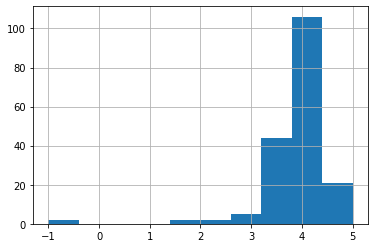

In [13]:
df.Rating.hist()

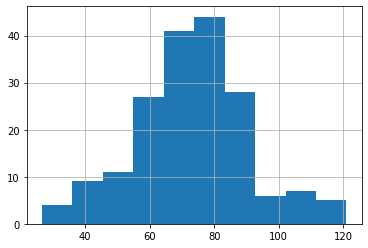

In [14]:
df.avg_salary.hist()

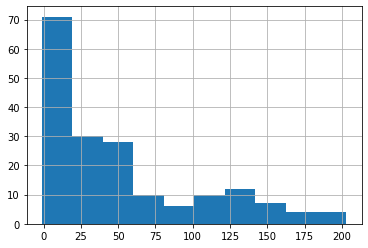

In [15]:
df.age.hist()

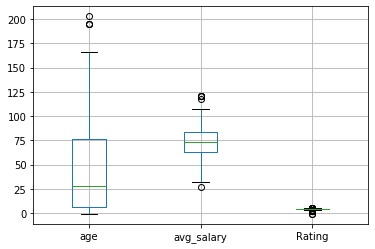

In [16]:
df.boxplot(column = ['age','avg_salary','Rating'])

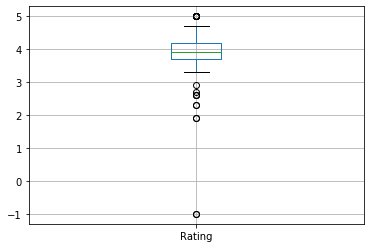

In [17]:
df.boxplot(column='Rating')

In [18]:
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,-0.173406,0.047445,0.061833
avg_salary,-0.173406,1.000000,0.209131,0.011085
Rating,0.047445,0.209131,1.000000,0.084998
desc_len,0.061833,0.011085,0.084998,1.000000


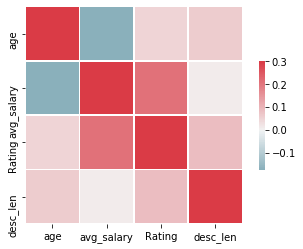

In [19]:
#correlation
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# => From the heatmap,
# => age and avg_salary are negatively correlated
# => Rating and avg_salary are highly correlated 

graph for Location: total = 76


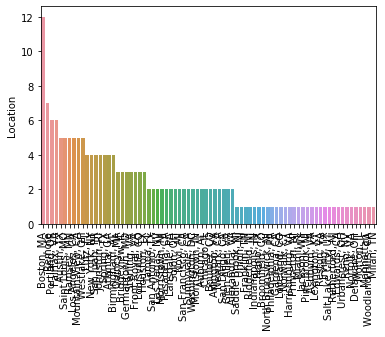

graph for Size: total = 9


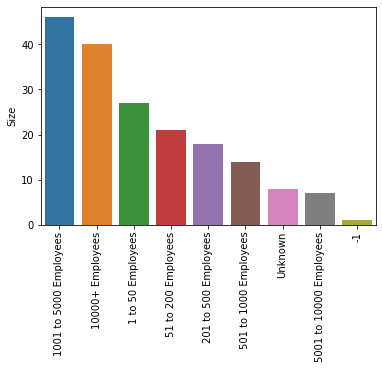

graph for Type of ownership: total = 3


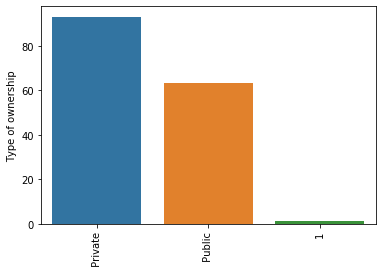

graph for Industry: total = 38


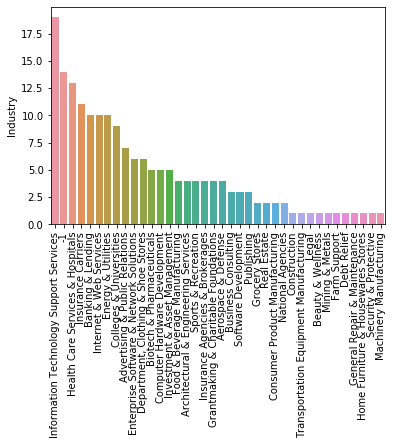

graph for Sector: total = 21


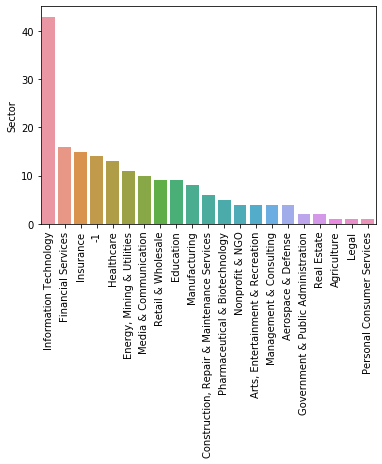

graph for Revenue: total = 11


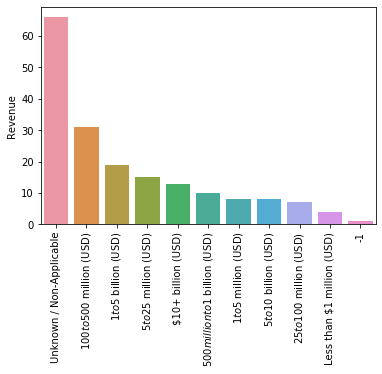

graph for Company Name: total = 89


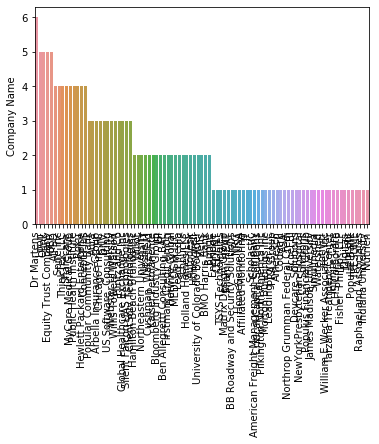

graph for job_state: total = 28


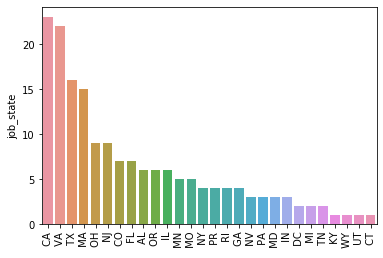

graph for python: total = 2


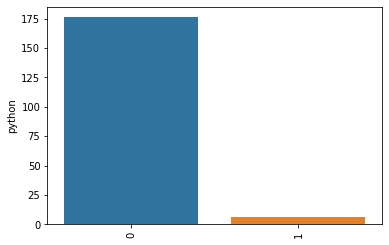

graph for sql: total = 2


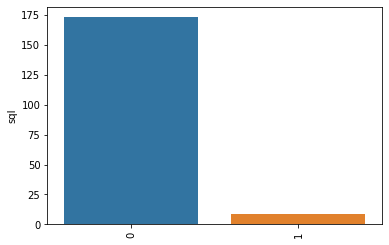

graph for excel: total = 2


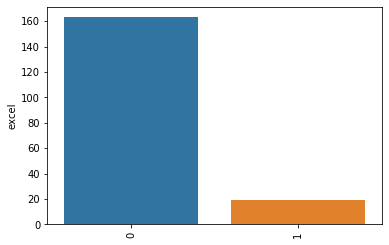

graph for job_simp: total = 1


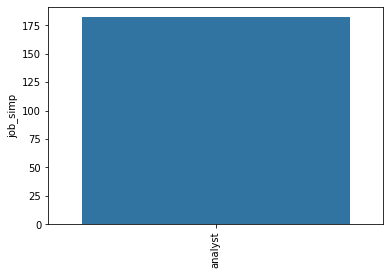

graph for seniority: total = 3


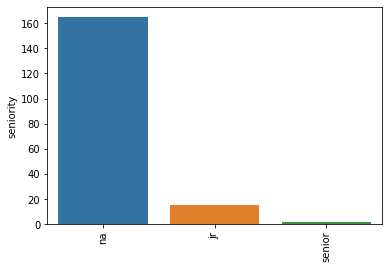

In [20]:
df_cat = df[['Location', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'Company Name', 'job_state', 'python', 'sql',
       'excel', 'job_simp', 'seniority']]
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [21]:
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'Min Salary', 'Max Salary', 'avg_salary', 'job_state', 'age', 'python',
       'excel', 'sql', 'Private', 'Public', 'desc_len', 'job_simp',
       'seniority'],
      dtype='object')

In [22]:
pd.pivot_table(df, index = ['Sector','Size'], values = 'avg_salary', aggfunc='count')

avg_salary
Sector                                      Size                               
-1                                          -1                                1
                                            1 to 50 Employees                13
Aerospace & Defense                         1 to 50 Employees                 3
                                            1001 to 5000 Employees            1
Agriculture                                 10000+ Employees                  1
Arts, Entertainment & Recreation            1001 to 5000 Employees            1
                                            51 to 200 Employees               3
Construction, Repair & Maintenance Services 1 to 50 Employees                 4
                                            1001 to 5000 Employees            2
Education                                   10000+ Employees                  2
                                            1001 to 5000 Employees            6
                                            5001 to 10000 Employees           1
Energy, Mining & Utilities                  10000+ Employees                  4
                                            1001 to 5000 Employees            5
                                            5001 to 10000 Employees           1
                                            51 to 200 Employees               1
Financial Services                          10000+ Employees                  2
                                            1001 to 5000 Employees            3
                                            201 to 500 Employees              7
                                            5001 to 10000 Employees           3
                                            51 to 200 Employees               1
Government & Public Administration          Unknown                           2
Healthcare                                  10000+ Employees                  4
                                            1001 to 5000 Employees            4
                                            501 to 1000 Employees             4
                                            Unknown                           1
Information Technology                      1 to 50 Employees                 4
                                            10000+ Employees                  9
                                            1001 to 5000 Employees           13
                                            201 to 500 Employees              3
                                            5001 to 10000 Employees           1
                                            501 to 1000 Employees             3
                                            51 to 200 Employees               7
                                            Unknown                           3
Insurance                                   10000+ Employees                  5
                                            1001 to 5000 Employees            3
                                            201 to 500 Employees              4
                                            51 to 200 Employees               1
                                            Unknown                           2
Legal                                       501 to 1000 Employees             1
Management & Consulting                     10000+ Employees                  3
                                            501 to 1000 Employees             1
Manufacturing                               1 to 50 Employees                 1
                                            10000+ Employees                  5
                                            201 to 500 Employees              2
Media & Communication                       1 to 50 Employees                 2
                                            1001 to 5000 Employees            2
                                            201 to 500 Employees              2
                                            5001 to 10000 Employees  

In [23]:
# df.to_csv('salary_seniority.csv',index=False)

In [24]:
pd.pivot_table(df, index = ['Sector','Size'], values = 'avg_salary', aggfunc='count')

avg_salary
Sector                                      Size                               
-1                                          -1                                1
                                            1 to 50 Employees                13
Aerospace & Defense                         1 to 50 Employees                 3
                                            1001 to 5000 Employees            1
Agriculture                                 10000+ Employees                  1
Arts, Entertainment & Recreation            1001 to 5000 Employees            1
                                            51 to 200 Employees               3
Construction, Repair & Maintenance Services 1 to 50 Employees                 4
                                            1001 to 5000 Employees            2
Education                                   10000+ Employees                  2
                                            1001 to 5000 Employees            6
                                            5001 to 10000 Employees           1
Energy, Mining & Utilities                  10000+ Employees                  4
                                            1001 to 5000 Employees            5
                                            5001 to 10000 Employees           1
                                            51 to 200 Employees               1
Financial Services                          10000+ Employees                  2
                                            1001 to 5000 Employees            3
                                            201 to 500 Employees              7
                                            5001 to 10000 Employees           3
                                            51 to 200 Employees               1
Government & Public Administration          Unknown                           2
Healthcare                                  10000+ Employees                  4
                                            1001 to 5000 Employees            4
                                            501 to 1000 Employees             4
                                            Unknown                           1
Information Technology                      1 to 50 Employees                 4
                                            10000+ Employees                  9
                                            1001 to 5000 Employees           13
                                            201 to 500 Employees              3
                                            5001 to 10000 Employees           1
                                            501 to 1000 Employees             3
                                            51 to 200 Employees               7
                                            Unknown                           3
Insurance                                   10000+ Employees                  5
                                            1001 to 5000 Employees            3
                                            201 to 500 Employees              4
                                            51 to 200 Employees               1
                                            Unknown                           2
Legal                                       501 to 1000 Employees             1
Management & Consulting                     10000+ Employees                  3
                                            501 to 1000 Employees             1
Manufacturing                               1 to 50 Employees                 1
                                            10000+ Employees                  5
                                            201 to 500 Employees              2
Media & Communication                       1 to 50 Employees                 2
                                            1001 to 5000 Employees            2
                                            201 to 500 Employees              2
                                            5001 to 10000 Employees  

In [25]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided', 'python', 'sql', 'excel', 'Type of ownership','avg_salary']]


In [26]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
 4.2     89.531250
 2.6     82.333333
 3.6     81.500000
 4.5     80.000000
 4.1     79.441176
 4.4     75.500000
 4.0     75.445000
 2.7     74.000000
 4.3     73.423077
 3.3     72.750000
 3.9     68.303500
 3.8     67.590909
 3.7     67.250000
 5.0     66.375000
 3.5     66.000000
 2.3     62.500000
 3.4     61.050000
 1.9     58.000000
 4.7     56.000000
-1.0     45.000000
 2.9     26.625000
Industry
                                         avg_salary
Industry                                           
Grantmaking & Charitable Foundations      99.000000
Internet & Web Services                   91.900000
Real Estate                               90.500000
National Agencies                         90.000000
Business Consulting                       85.833333
Software Development                      83.500000
Information Technology Support Services   83.131579
Department, Clothing & Shoe Stores        83.000000
Grocery Stores             

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [27]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'Min Salary', 'Max Salary', 'avg_salary', 'job_state', 'age', 'python',
       'excel', 'sql', 'Private', 'Public', 'desc_len', 'job_simp',
       'seniority'],
      dtype='object')

In [ ]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'excel', values = 'avg_salary', aggfunc = 'count')

In [35]:
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sadiatabassum/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [40]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,job_state,age,python,excel,sql,Private,Public,desc_len,job_simp,seniority
0,Data Analyst I,$41K - $55K (Glassdoor est.),Job Summary:\nIf you live in or around the San...,4.3,Firstmark Credit Union,"San Antonio, TX",201 to 500 Employees,1932,Private,Banking & Lending,...,TX,91,0,0,0,1,0,870,analyst,na
1,Reporting Data Analyst,$64K - $92K (Glassdoor est.),"Medlogix, LLC delivers innovative medical clai...",2.6,MEDLOGIX LLC,"Lansdale, PA",Unknown,-1,Private,Insurance Carriers,...,PA,-1,0,0,0,1,0,1004,analyst,na
2,Junior Data Analyst,$45K - $69K (Glassdoor est.),Hintz and Co is a boutique full service media ...,3.8,Hintz and Co,"Los Angeles, CA",1 to 50 Employees,1979,Private,Architectural & Engineering Services,...,CA,44,0,0,0,1,0,875,analyst,jr
3,Data Analyst(SQL),$64K - $106K (Glassdoor est.),Job Title: Data Analyst (SQL)\nJob Summary: We...,4.1,Leading Torch LLC,"Plano, TX",1 to 50 Employees,-1,Private,-1,...,TX,-1,0,0,1,1,0,749,analyst,na
4,Data Analyst (Jr.),$80K - $100K (Employer est.),Department of Veterans Affairs experience? Do ...,4.0,Ben Allegretti Consulting BAC,"Washington, DC",Unknown,2007,NaN,National Agencies,...,DC,16,0,0,0,0,0,1240,analyst,jr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Data Analyst,$49K - $70K (Glassdoor est.),Chicago Fire Football Club is a Major League S...,3.8,Chicago Fire FC,"Bridgeview, IL",51 to 200 Employees,-1,Private,Sports & Recreation,...,IL,-1,0,0,0,1,0,956,analyst,na
188,Junior Data Analyst,$59K - $95K (Employer est.),Junior Data Analyst\nThis role is open to our ...,4.1,Hotwire Global,"San Francisco, CA",201 to 500 Employees,2000,Public,Advertising & Public Relations,...,CA,23,0,0,0,0,1,775,analyst,jr
189,Junior Business Analyst,$65K - $90K (Employer est.),Who We Are: ThinkTek is a fast-growing Certifi...,5.0,ThinkTek LLC,"Fairfax, VA",1 to 50 Employees,-1,Private,-1,...,VA,-1,0,0,0,1,0,1061,analyst,jr
190,Data Analyst,$67K - $100K (Glassdoor est.),Aura is on a mission to create a safer interne...,4.3,Aura,"Boston, MA",201 to 500 Employees,2017,Private,Software Development,...,MA,6,0,0,0,1,0,870,analyst,na


In [41]:
df.to_csv('data_eda.csv',index=False)